 Goal of the Dataset:

The goal of this dataset is to predict housing prices based on multiple features such as the number of bedrooms, lot size, number of bathrooms, and other related characteristics.
This dataset helps in building regression models that estimate the selling price of a house given various attributes. Additionally, we aim to apply both classification and clustering techniques to further analyze and group the data.



 Dataset Source:

This dataset was obtained from Kaggle, a popular platform for datasets and machine learning challenges.

Link to the dataset: [Housing Prices Dataset on Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

In [35]:
import piplite
await piplite.install('seaborn')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Housing = pd.read_csv('Housing.csv')

Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
Housing.shape[1]

13

In [37]:
Housing.shape[0]

545

In [38]:
# Get the number of rows and columns
Housing.shape

(545, 13)

In [39]:
# Display the column names
Housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [40]:
# Column names and types
Housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [41]:
#"A class label to indicate the affordability of the house. 
Housing['Class_Label'] = Housing['price'].apply(lambda x: 'Expensive' if x >= 5000000 else 'Affordable')

print(Housing)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

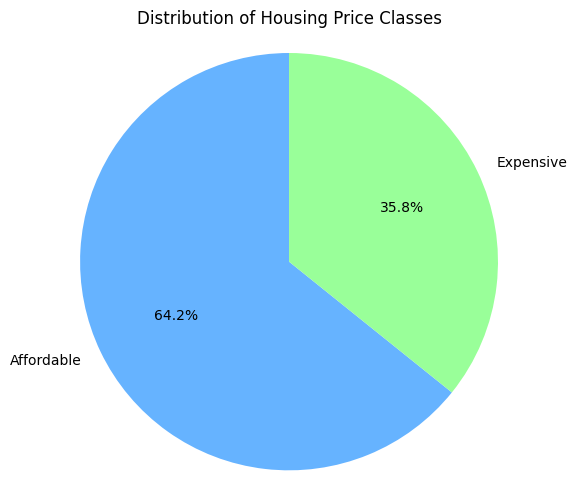

In [42]:
# A pie chart visualization for the classification label

# Count the occurrences of each class label
class_counts = Housing['Class_Label'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'], startangle=90)
plt.title('Distribution of Housing Price Classes')
plt.axis('equal') 
plt.show()


In [43]:
# Display basic statistics about the target variable
target_variable_stats = Housing['price'].describe()
target_variable_range = Housing['price'].min(), Housing['price'].max()

target_variable_stats, target_variable_range

(count    5.450000e+02
 mean     4.766729e+06
 std      1.870440e+06
 min      1.750000e+06
 25%      3.430000e+06
 50%      4.340000e+06
 75%      5.740000e+06
 max      1.330000e+07
 Name: price, dtype: float64,
 (1750000, 13300000))

In [44]:
# Target Variable

# In this dataset, the target variable is `price`, which represents the selling price of the houses. This is a continuous numerical variable used for regression analysis.

#  Target Variable Details:
# - Name: `price`
# - Type: Numerical (Continuous)
# - Range: From 1,750,000 to 13,300,000
# - Statistics:
# - Mean: 4,766,729
# - Standard Deviation: 1,870,440
# - Median: 4,340,000
# - Minimum Value: 1,750,000
# - 25th Percentile: 3,430,000
# - 75th Percentile: 5,740,000
# - Maximum Value: 13,300,000

In [45]:
Raw_samples = Housing.head()
# Display the raw samples
print("Raw Samples:\n", Raw_samples)

Raw Samples:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

  Class_Label  
0   Expensive  
1   Expensive  
2   Expensive  
3   Expensive 

The first few rows of the dataset give us an idea of the range and structure of the data.
we can see that houses vary widely in their attributes, such as the number of bedrooms, bathrooms, and prices. This helps confirm that the dataset is rich with information for further analysis

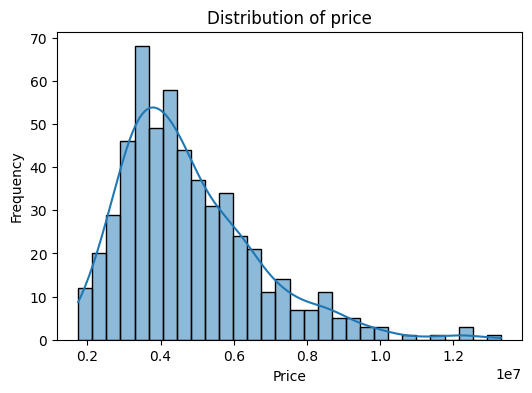

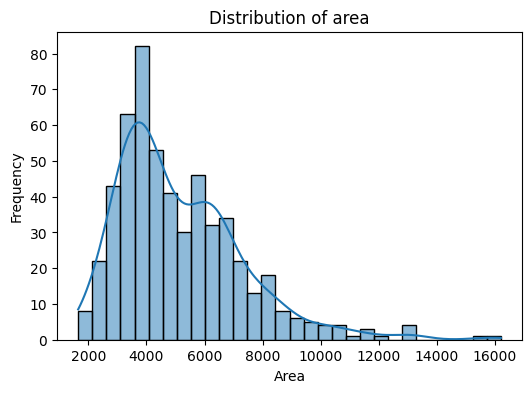

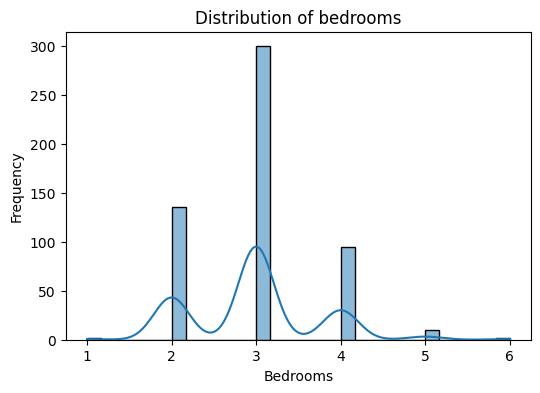

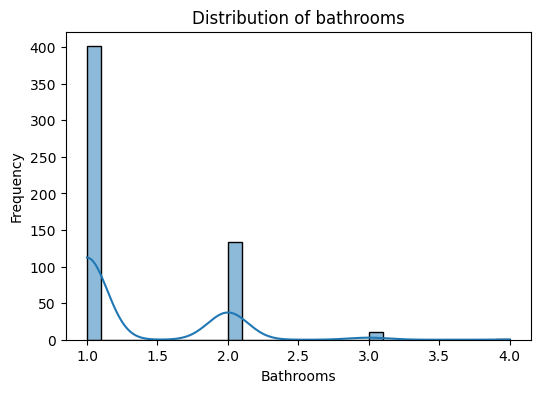

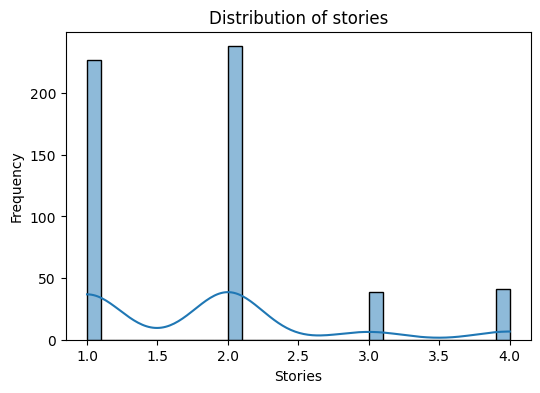

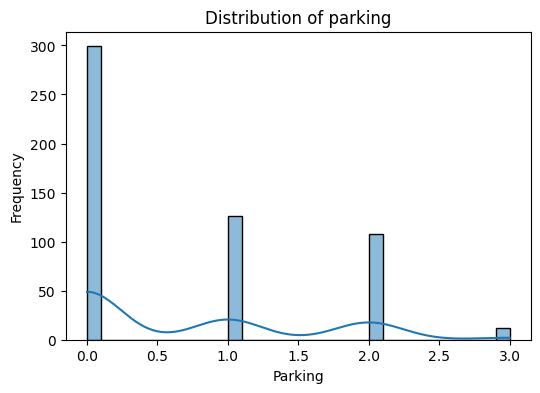

In [46]:
# Create a Histogram
# List of numerical columns 
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(Housing[col], bins=30, kde=True)
    #adds a title to the histogram
    plt.title(f'Distribution of {col}') 
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    # display the histogram
    plt.show()

Price:
The graph of price shows that most houses in the dataset fall in the lower price ranges, with fewer houses at the higher end. This suggests that affordable housing is more common in this dataset, and there are only a small number of very expensive houses.

Area:
Most common house sizes: The highest bar is around 4000 square feet. This indicates that the majority of the houses in the dataset are moderately sized, generally between 3000 to 5000 square feet.
Smaller number of larger homes: Beyond 5000 square feet, the frequency starts to drop significantly. However, there are still a few larger homes up to 16,000 square feet, though they are much less common.
Homes smaller than 2000 square feet are less common, but there are a few in the dataset.

Bedrooms:
Most houses have 2 or 3 bedrooms, as indicated by the peak in the histogram. There are fewer houses with 1 bedroom or 4 or 5 bedrooms, meaning that standard family homes make up the majority of the dataset.

Bathrooms:
Similar to bedrooms, most houses have 1 or 2 bathrooms. There are very few houses with more than 3 bathrooms, indicating that larger, more luxurious homes are less common.

Stories:
The majority of houses are single-story or two-story homes. Houses with three or more stories are quite rare, which aligns with the general expectation for residential housing.

Parking:
Most houses provide 1-2 parking spaces, which suggests that houses with no parking or more than 2 parking spaces are uncommon.


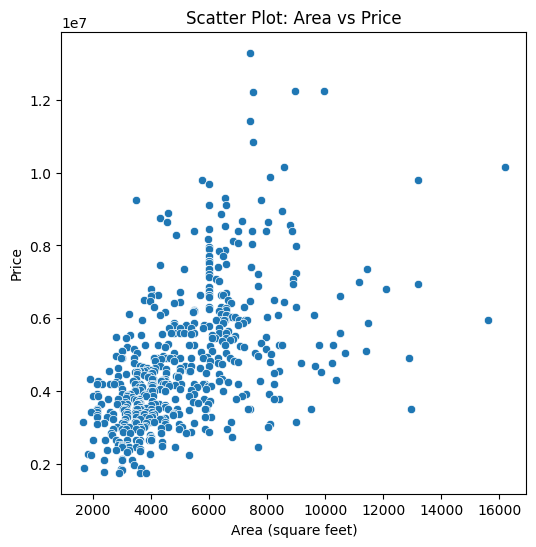

In [47]:
# Create a scatter plot of area vs price
plt.figure(figsize=(6, 6))
sns.scatterplot(x=Housing['area'], y=Housing['price'])
plt.title('Scatter Plot: Area vs Price')
plt.xlabel('Area (square feet)')
plt.ylabel('Price')
plt.show()

The scatter plot shows a clear trend: as the area of the house increases, the price also tends to increase. There is a strong positive correlation between these two variables, which means that bigger houses generally cost more. However, there are some outliers where smaller houses are priced higher—possibly due to factors like location, additional features, or luxury status

In [48]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

descriptive_stats = Housing[numerical_columns].describe()

descriptive_stats.loc['variance'] = Housing[numerical_columns].var()

# Display the table
descriptive_stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5.150541e+03,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2.170141e+03,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1.650000e+03,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3.600000e+03,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4.600000e+03,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6.360000e+03,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,1.620000e+04,6.000000,4.000000,4.000000,3.000000
variance,3.498544e+12,4.709512e+06,0.544738,0.252476,0.752543,0.742330


Price:
There are 545 houses in the dataset, with an average price of approximately 4.77 million.
Prices range from 1.75 million to 13.3 million, showing a significant spread.
The middle 50% of houses have prices between 3.43 million (25th percentile) and 5.74 million (75th percentile), meaning half the houses are within this price range.
The high variance (3.5 trillion) and standard deviation indicate that house prices vary greatly.
Area:

Houses have an average size of around 5,150 square feet.
Sizes range from 1,650 to 16,200 square feet, with larger homes being relatively rare.
The 50% range is between 3,600 (25th percentile) and 6,360 square feet (75th percentile).
The variance (4.71 million) shows that the size of homes varies significantly.

Bedrooms:
On average, houses have around 3 bedrooms.
Most homes have between 2 and 3 bedrooms, with the maximum being 6 bedrooms.
The variance (0.54) indicates a moderate difference in the number of bedrooms across the dataset.

Bathrooms:
The average number of bathrooms is around 1.3, with most houses having either 1 or 2 bathrooms.
The variance (0.25) shows a relatively small difference in the number of bathrooms.

Stories:
Houses typically have 2 stories, with an average of 1.8 stories.
Homes have between 1 and 4 stories.
Variance (0.75) shows some variation in the number of stories, with most homes having 1 or 2.

Parking:
Most homes have no parking spots, with an average of 0.7 spots.
Parking spots range from 0 to 3.
Variance (0.74) shows that there is variation in parking availability, but most homes likely have few or no parking spots.

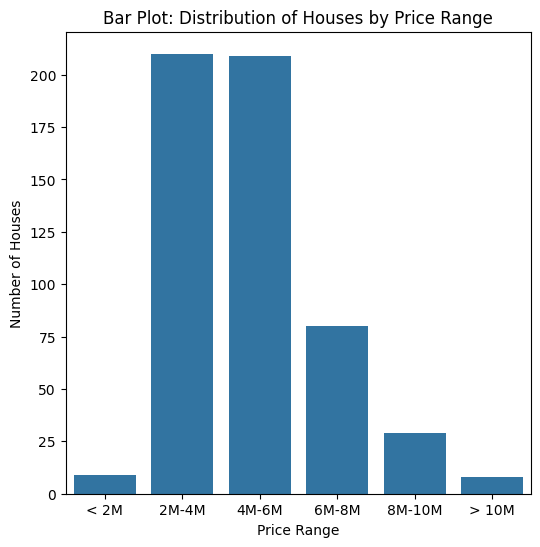

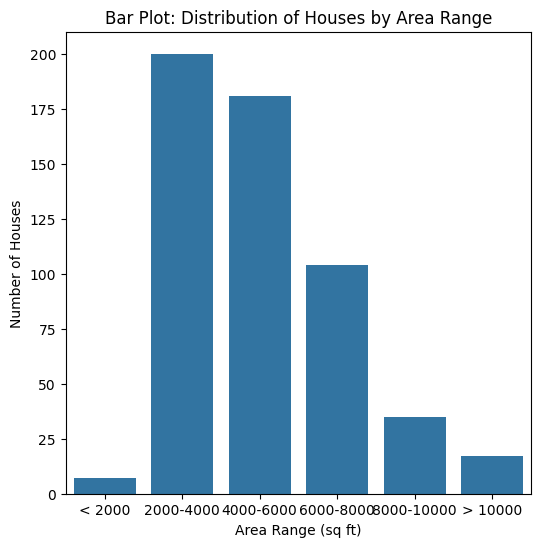

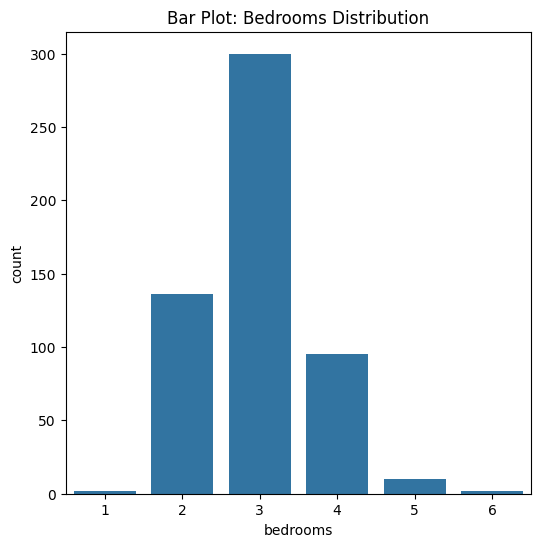

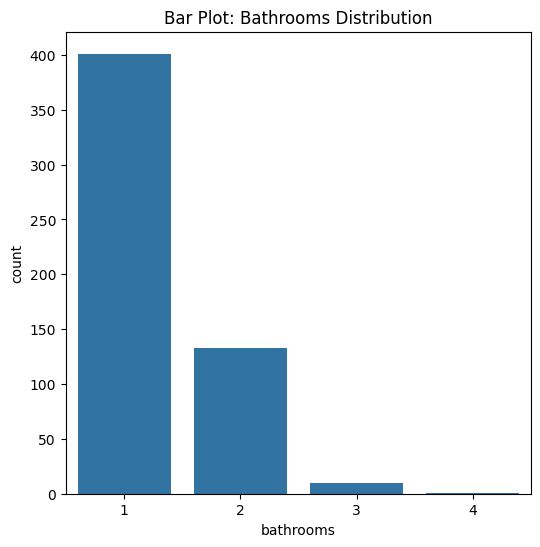

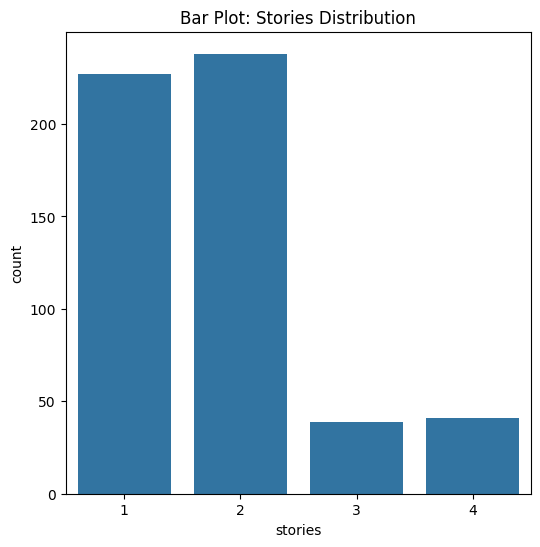

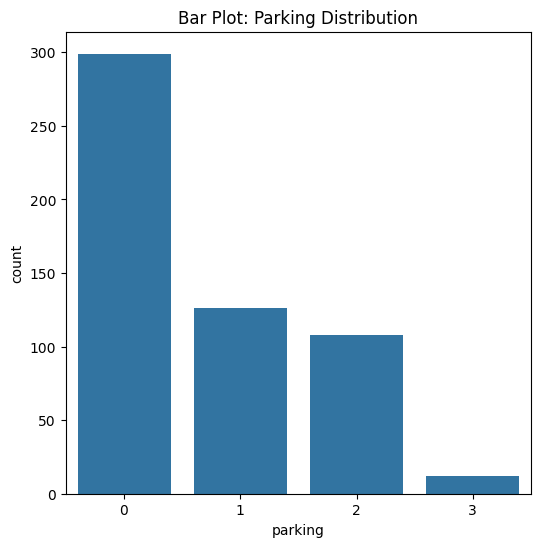

In [49]:
#Bar plots

# Define price ranges
price_bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 14000000]

# Assign names to each bin
price_labels = ['< 2M', '2M-4M', '4M-6M', '6M-8M', '8M-10M', '> 10M']


#Bar Plot: Distribution of houses in different price ranges (initializes a new figure for the plot)
plt.figure(figsize=(6, 6))

#e creates the bar plot using Seaborn's countplot() function
sns.countplot(x=pd.cut(Housing['price'], bins=price_bins, labels=price_labels))

#Creating the bar plot
plt.title("Bar Plot: Distribution of Houses by Price Range")

#Labeling the axes clearly to eliminate any ambiguity in understanding the data represented in the plot.
plt.xlabel("Price Range")
plt.ylabel("Number of Houses")

#display the plot
plt.show()

#-------------------------------------------------------------------------


#Bar Plot: area Distribution

# Define area ranges (bins)
area_bins = [0, 2000, 4000, 6000, 8000, 10000, 16000]
# Assign names to each bin
area_labels = ['< 2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '> 10000']

# Directly bin 'area' and pass the binned data to the countplot
plt.figure(figsize=(6, 6))
sns.countplot(x=pd.cut(Housing['area'], bins=area_bins, labels=area_labels))
plt.title("Bar Plot: Distribution of Houses by Area Range")
plt.xlabel("Area Range (sq ft)")
plt.ylabel("Number of Houses")
plt.show()

#---------------------------------------------------------------

#Bar Plot: bedrooms Distribution

#Setting the size of the figure
plt.figure(figsize=(6, 6))

#Creating the bar plot
sns.countplot(x="bedrooms", data=Housing)

#Adding a title to the plot
plt.title("Bar Plot: Bedrooms Distribution")

#display the plot
plt.show()

#---------------------------------------------------------------
#Bar Plot: bathrooms Distribution

plt.figure(figsize=(6, 6))
sns.countplot(x="bathrooms", data=Housing)
plt.title("Bar Plot: Bathrooms Distribution")
plt.show()
#---------------------------------------------------------------

#Bar Plot: stories Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x="stories", data=Housing)
plt.title("Bar Plot: Stories Distribution")
plt.show()

#--------------------------------------------------------------

#Bar Plot: parking Distribution
plt.figure(figsize=(6, 6))
sns.countplot(x="parking", data=Housing)
plt.title("Bar Plot: Parking Distribution")
plt.show()




  A bar plot is a simple graph that uses rectangular bars to represent data, with the bar's height showing the value or frequency of a category. It allows for easy comparison between different groups, making patterns and trends obvious. Bar plots are perfect for categorical data, helping to visualize the distribution and quickly spot which categories are more common. They are intuitive and easy to understand, even for non-experts. Additionally, bar plots make it simple to detect outliers or unusual values in the dataset.

1-Bar Plot: Distribution of Houses by Price Range Output: A bar chart with price ranges on the x-axis and the number of houses on the y-axis. Insight: Each bar shows a different price range chosen randomly to minimize the size of the bar plot (e.g., less than 2M, 2M-4M, etc.). The height of the bar tells you how many houses fall into that price range. If the bar for the 4M-6M range is the tallest, it means most houses in the dataset are priced between 4 and 6 million.

2-Bar Plot: Distribution of Houses by Area Range The output is a bar chart, where area ranges are randomly selected to minimize the size of the bar plot (such as less than 2000, 2000-4000, etc.) on the x-axis and the number of houses on the y-axis. Insight: Each bar shows how many houses have a certain area size, measured in square feet. For example, if the 2000-4000 sq ft bar is the tallest, it means most houses are within that size range, showing which house sizes are most common.

3-Bar Plot: Bedrooms Distribution Output: A bar chart with the number of bedrooms on the x-axis and the number of houses on the y-axis. Insight: This chart shows how many houses have a certain number of bedrooms. If the "3 bedrooms" bar is the tallest, it means that most houses in the dataset have 3 bedrooms.

4-Bar Plot: Bathrooms Distribution Output: A bar chart with the number of bathrooms on the x-axis and the number of houses on the y-axis. Insight: The chart shows how many houses have a certain number of bathrooms. If the bar for 2 bathrooms is the tallest, it means most houses have 2 bathrooms.

5-Bar Plot: Stories Distribution Output: A bar chart with the number of stories (or floors) on the x-axis and the number of houses on the y-axis. Insight: This chart shows how many houses have 1, 2, or more stories. The tallest bar indicates the most common number of stories in the dataset.

6-Bar Plot: Parking Distribution Output: A bar chart with the number of parking spaces on the x-axis and the number of houses on the y-axis. Insight: The chart shows how many houses have different numbers of parking spaces. If the "2 parking spaces" bar is the tallest, it means most houses have 2 parking spaces.

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
Class_Label         0
dtype: int64

Total number of missing values in the dataset: 0


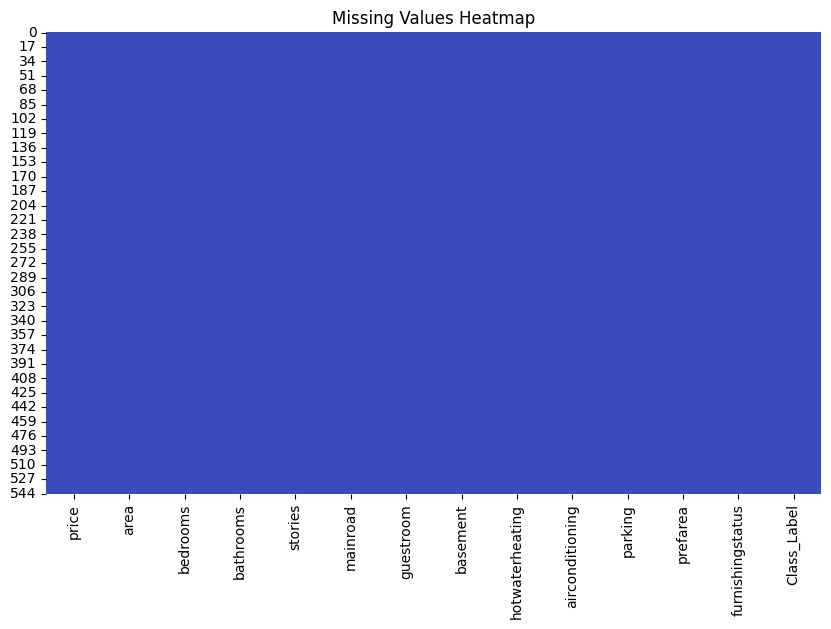

In [50]:
#check for missing values in the entire dataset
missing_values = Housing.isnull().sum()

#display the result
print("Missing values in each column:")
print(missing_values)

#total number of missing value
print("\nTotal number of missing values in the dataset:",missing_values.sum())

#Setting up the figure size
plt.figure(figsize=(10, 6))

#Creating the heatmap for missing values, using blue for non-missing values and red for missing values.
sns.heatmap(Housing.isnull(), cmap='coolwarm', cbar=False)

#Adding a title to the heatmap
plt.title("Missing Values Heatmap")

#Displaying the plot
plt.show()

#Since our dataset doesn’t have any missing values, we don’t need to handle missing data or drop any rows or columns.

Checking for missing values in a dataset is crucial because it helps assess the data's quality and identify any issues with how it was collected. Missing values can impact analysis, so knowing where they are allows you to decide how to handle them, whether by filling them in, removing them, or ignoring them. Additionally, understanding missing data can reveal patterns and insights that might be useful. Ensuring that the dataset is complete ultimately leads to more accurate results and better decision-making.

since there are no missing values in the dataset, the heatmap will be entirely blue because:

Blue represents non-missing values, and since there are no missing entries, no red will appear on the heatmap. The plot will have no visual gaps or red marks, indicating that the dataset is complete with no missing values.

In [51]:
#desciptive stats
Housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [52]:
#shape of the dataframe before cleaning 
Housing.shape

(545, 14)

In [53]:
#define a function called "plot_boxplot" to show the boxplots for the data

def plot_boxplot(df , ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

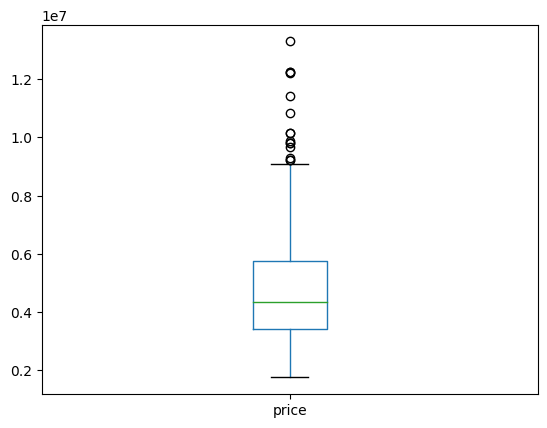

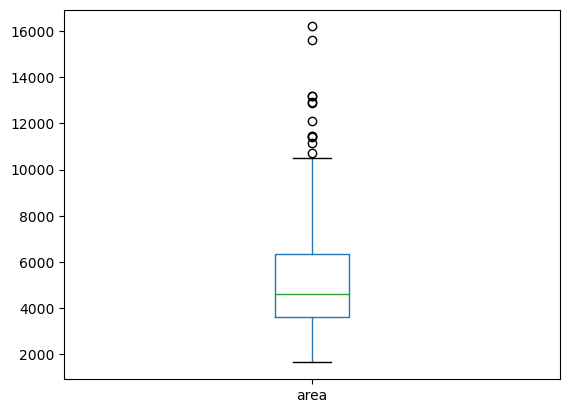

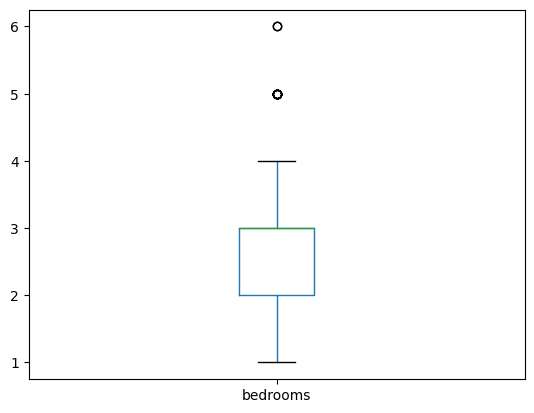

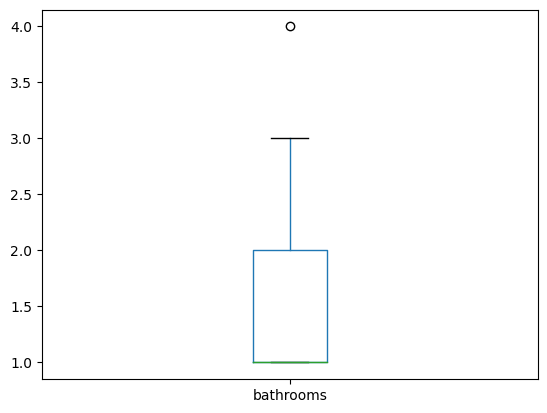

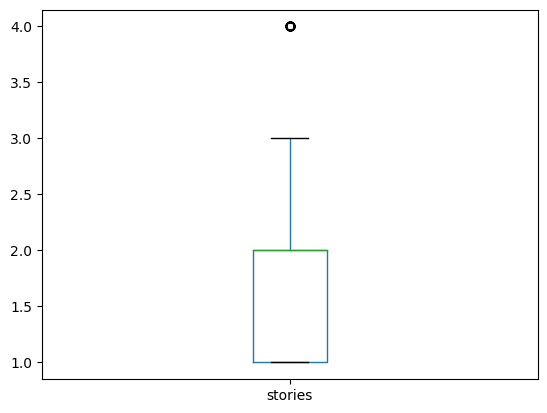

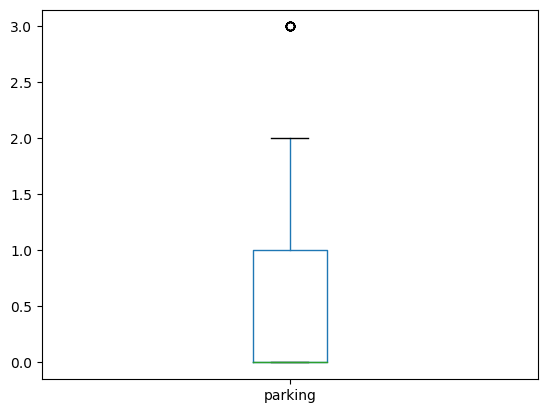

In [54]:
#show the boxplot for each numeric column

plot_boxplot(Housing , "price")
plot_boxplot(Housing , "area")
plot_boxplot(Housing , "bedrooms")
plot_boxplot(Housing , "bathrooms")
plot_boxplot(Housing , "stories")
plot_boxplot(Housing , "parking")

In [55]:
#define a function called "find_outliers" which returns a list for the outliers indexs

def find_outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

In [56]:
# Create an empty list to store the output indices from multiple columns and drop the outliers by looping 
index_list = []  
for feature in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    outliers = find_outliers(Housing, feature)  
    index_list += outliers.tolist()  # Convert Index object to list and accumulate

# Drop all the outliers from the DataFrame
HousingC = Housing.drop(index_list, errors='ignore')


In [57]:
#calling the list with the outliers index
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 7,
 10,
 56,
 64,
 66,
 69,
 125,
 129,
 186,
 191,
 211,
 403,
 7,
 28,
 34,
 89,
 112,
 143,
 152,
 271,
 340,
 356,
 395,
 536,
 1,
 1,
 6,
 9,
 17,
 26,
 30,
 31,
 35,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 50,
 51,
 52,
 53,
 57,
 58,
 59,
 71,
 72,
 73,
 83,
 92,
 94,
 102,
 105,
 124,
 131,
 135,
 140,
 145,
 160,
 220,
 226,
 247,
 1,
 3,
 47,
 93,
 225,
 247,
 299,
 304,
 323,
 331,
 401,
 472]

In [58]:
#shape of the dataframe after cleaning , as shown the rows decresed from 545 to 463
HousingC.shape

(463, 14)

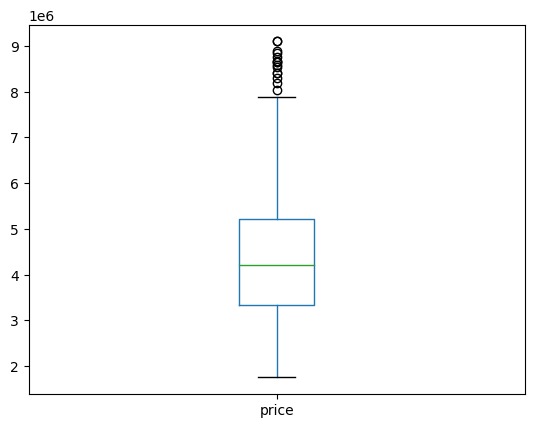

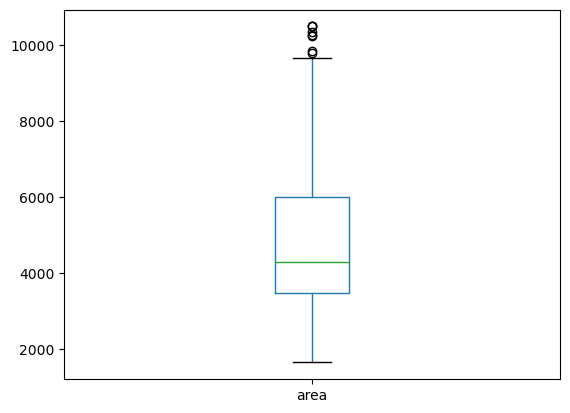

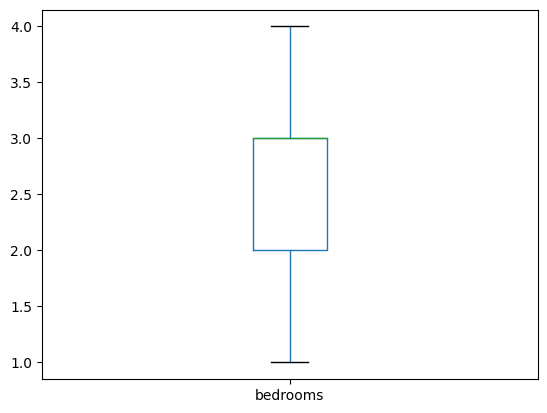

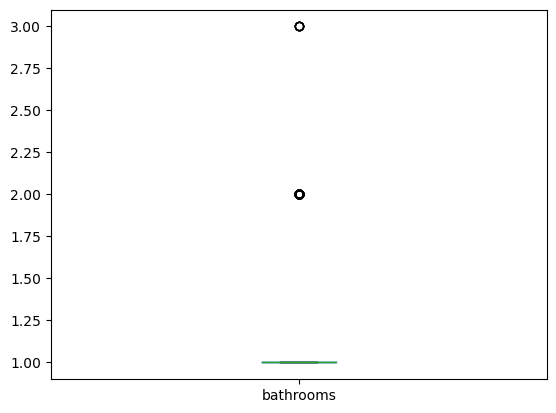

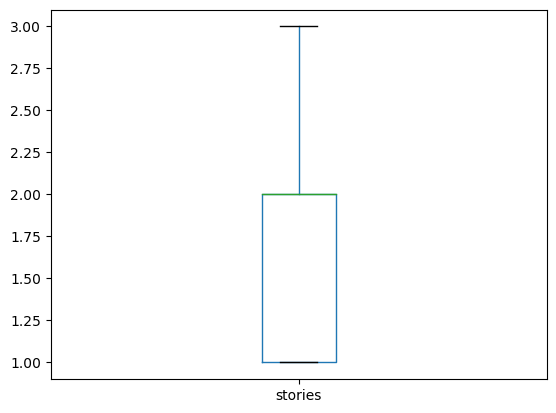

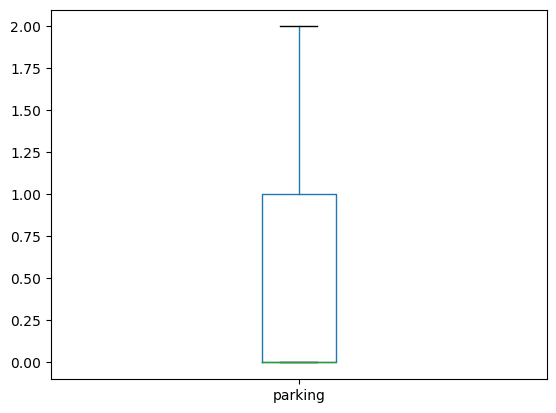

In [59]:
#showing the boxplots after cleaninng the data
plot_boxplot(HousingC,"price")
plot_boxplot(HousingC,"area")
plot_boxplot(HousingC,"bedrooms")
plot_boxplot(HousingC,"bathrooms")
plot_boxplot(HousingC,"stories")
plot_boxplot(HousingC,"parking")

Data Cleaning :-
Data cleaning is a vital step in data analysis and machine learning, as it ensures accuracy, consistency, and reliability of results. Before beginning the cleaning process, we identified the columns containing numeric data. To improve efficiency, we defined specific functions for the necessary algorithms and called them when needed. 

The first function, `boxplot`, generates a boxplot for a specified column, allowing for a visual representation of data distribution and potential outliers. The second function, `find_outliers`, uses the IQR (Interquartile Range) method to identify outliers and returns a list of their indices. We then created an empty list to store the indices of outliers from each column, which was populated using a loop. Finally, we used the `drop` command to remove the identified outliers from the dataset, ensuring a cleaner and more accurate dataset for further analysis.

Regarding the results, the data cleaning process led to a reduction in the number of rows from 545 to 463, reflecting the removal of outliers. The boxplot analysis showed an overall shift to lower values, indicating that the cleaned dataset is now more consistent and free from extreme deviations.


In [60]:
#Encoding the dataset (BRFORE cleaning)

from sklearn.preprocessing import LabelEncoder 
from scipy import stats 

le=LabelEncoder()
Housing['mainroad'] =le.fit_transform(Housing['mainroad'])
Housing['guestroom'] =le.fit_transform(Housing['guestroom'])
Housing['basement'] =le.fit_transform(Housing['basement'])
Housing['hotwaterheating'] =le.fit_transform(Housing['hotwaterheating'])
Housing['airconditioning'] =le.fit_transform(Housing['airconditioning'])
Housing['prefarea'] =le.fit_transform(Housing['prefarea'])
Housing['furnishingstatus'] =le.fit_transform(Housing['furnishingstatus'])

print(Housing)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [61]:
#Encoding the dataset (AFTER cleaning)

from sklearn.preprocessing import LabelEncoder 
from scipy import stats 

le=LabelEncoder()
HousingC['mainroad'] =le.fit_transform(HousingC['mainroad'])
HousingC['guestroom'] =le.fit_transform(HousingC['guestroom'])
HousingC['basement'] =le.fit_transform(HousingC['basement'])
HousingC['hotwaterheating'] =le.fit_transform(HousingC['hotwaterheating'])
HousingC['airconditioning'] =le.fit_transform(HousingC['airconditioning'])
HousingC['prefarea'] =le.fit_transform(HousingC['prefarea'])
HousingC['furnishingstatus'] =le.fit_transform(HousingC['furnishingstatus'])

print(HousingC)

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15   9100000  6000         4          1        2         1          0   
16   9100000  6600         4          2        2         1          1   
18   8890000  4600         3          2        2         1          1   
19   8855000  6420         3          2        2         1          0   
20   8750000  4320         3          1        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
15          1                0                0      

Data Encoding:-
For encoding, we focused on both binary and nominal data. The binary variables—**mainroad, guestroom, basement, hotwaterheating, airconditioning,** and **prefarea**—were encoded into 0s and 1s to represent "no" and "yes" values, respectively. 

For the nominal variable **furnishingstatus**, we applied a different encoding method, assigning integer values of 0, 1, and 2 to indicate the categories of **furnished, unfurnished,** and **semi-furnished**. This encoding ensures that the categorical data is appropriately represented in numerical form, facilitating effective analysis and modeling. 

In [62]:
# normlize area column

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Extract columns to normlize 
columns_to_normalize = ['area']
data_to_normalize = HousingC[columns_to_normalize ]

#Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

#Replace the normalized values in the original DaataFrame
HousingC[columns_to_normalize] = normalized_data_minmax

print("Min-Max scaled data(only second column):")
print(HousingC)


Min-Max scaled data(only second column):
       price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15   9100000  0.491525         4          1        2         1          0   
16   9100000  0.559322         4          2        2         1          1   
18   8890000  0.333333         3          2        2         1          1   
19   8855000  0.538983         3          2        2         1          0   
20   8750000  0.301695         3          1        2         1          0   
..       ...       ...       ...        ...      ...       ...        ...   
540  1820000  0.152542         2          1        1         1          0   
541  1767150  0.084746         3          1        1         0          0   
542  1750000  0.222599         2          1        1         1          0   
543  1750000  0.142373         3          1        1         0          0   
544  1750000  0.248588         3          1        2         1          0   

     basement  hotwaterheating  ai

I decided to apply Min-Max Scaling to the area column in the HousingC dataset (after data cleaning) to ensure that all features contribute equally in the models. I focused on this column because the other columns have relatively small values and don’t really need normalization; their differences are minor. By using Min-Max Scaling, I transformed the values to a range between 0 and 1, which makes it easier to compare them and prevents any feature from having an outsized influence on the models. After normalization, all values in the area column are now on the same scale, which helps improve the accuracy and effectiveness of the models.

In [63]:
# discretize area column

import pandas as pd 

# Discretization for a specific column('price')
column_to_discretize = 'price'
bins = [0, 5000000, float('inf')] 
labels = ['Low','High']

#Perform discretization using the cut function 
HousingC['discretized_' + column_to_discretize] = pd.cut(HousingC['price'], bins=bins, labels=labels)


print(HousingC[['price', 'discretized_price']])

       price discretized_price
15   9100000              High
16   9100000              High
18   8890000              High
19   8855000              High
20   8750000              High
..       ...               ...
540  1820000               Low
541  1767150               Low
542  1750000               Low
543  1750000               Low
544  1750000               Low

[463 rows x 2 columns]


I applied the discretization technique to the price column to group the data into two distinct categories: "Low" and "High". This transformation simplifies the data, making it easier to interpret and analyze. Prices below 5,000,000 were categorized as "Low", while those above were classified as "High". This method resulted in a new column that reflects each price's category, helping to streamline analysis by focusing on the key differences between low and high prices.



In [64]:
# Importing necessary libraries
from sklearn.feature_selection import SelectKBest, f_regression

# Defining the independent variables (features) and the dependent variable (target)
X = HousingC[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]
y = HousingC['price']

# Applying SelectKBest to choose the top 5 features based on f_regression
selector = SelectKBest(score_func=f_regression, k=5)  # Selecting the top 5 features
X_new = selector.fit_transform(X, y)

# Displaying the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features: ", selected_features)


Selected Features:  Index(['area', 'bedrooms', 'bathrooms', 'airconditioning', 'prefarea'], dtype='object')


I applied the SelectKBest method to identify the top 5 features that most significantly affect house prices. The following steps were followed:

- Defining Features and Target:
The independent variables (features) include attributes like area, bathrooms, stories, parking, and airconditioning.
The target variable is the price, which we aim to predict.

- Using f_regression as the Scoring Function:
To evaluate the relationship between each feature and the target variable, I used f_regression. This method scores the features based on their correlation with the target variable, helping us identify which features have the most impact on the house prices.

- Top 5 Features Selected:
The top 5 features were selected based on their scores. These features were identified as area, bathrooms, stories, parking, and airconditioning.

- Importance of Feature Selection:
By focusing on the most important features, we can simplify the model and reduce noise, which helps in building a more efficient and accurate prediction model. Feature selection also helps in avoiding overfitting and improves the model’s performance, especially when we have a large dataset with many variables.


In [65]:
# Define the features and target variable
fn = HousingC.columns.tolist()[:-1]  
X = HousingC[fn]  
y = HousingC['price']  

#encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)  # Converts categorical columns to numeric

# Discretize 'price' into categories for classification
y_binned = pd.cut(y, bins=3, labels=['Low', 'Medium', 'High'])

# choose the top 5 features based on mutual information for classification
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X_encoded, y)
X_selected = X_encoded[selected_features]

selected_features = X_encoded.columns[selector.get_support()]
print("Selected Features: ", selected_features)


Selected Features:  Index(['price', 'bedrooms', 'bathrooms', 'mainroad', 'Class_Label_Expensive'], dtype='object')



Train Size: 0.7, Test Size: 0.3, Criterion: gini
Accuracy: 0.6330935251798561
Classification Report:
               precision    recall  f1-score   support

        High       0.62      0.36      0.45        14
         Low       0.67      0.71      0.69        66
      Medium       0.59      0.61      0.60        59

    accuracy                           0.63       139
   macro avg       0.63      0.56      0.58       139
weighted avg       0.63      0.63      0.63       139



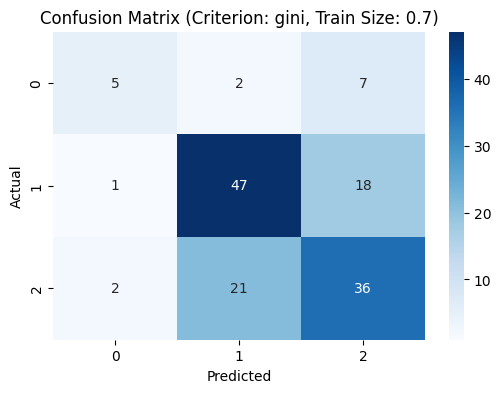


Train Size: 0.7, Test Size: 0.3, Criterion: entropy
Accuracy: 0.6330935251798561
Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.21      0.29        14
         Low       0.71      0.68      0.70        66
      Medium       0.58      0.68      0.62        59

    accuracy                           0.63       139
   macro avg       0.57      0.52      0.54       139
weighted avg       0.63      0.63      0.63       139



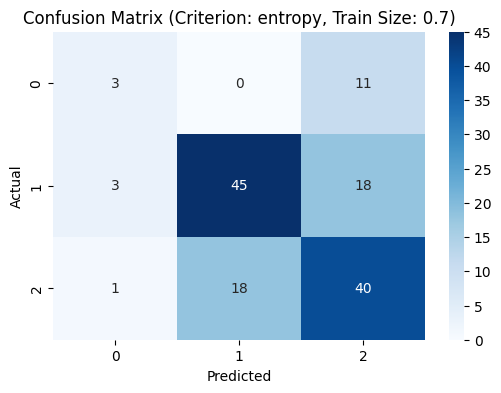


Train Size: 0.8, Test Size: 0.2, Criterion: gini
Accuracy: 0.7204301075268817
Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.38      0.46         8
         Low       0.72      0.87      0.79        45
      Medium       0.74      0.62      0.68        40

    accuracy                           0.72        93
   macro avg       0.69      0.62      0.64        93
weighted avg       0.72      0.72      0.71        93



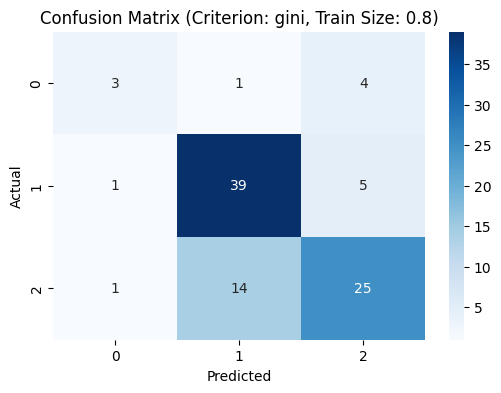


Train Size: 0.8, Test Size: 0.2, Criterion: entropy
Accuracy: 0.7204301075268817
Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.50      0.53         8
         Low       0.73      0.84      0.78        45
      Medium       0.74      0.62      0.68        40

    accuracy                           0.72        93
   macro avg       0.68      0.66      0.66        93
weighted avg       0.72      0.72      0.72        93



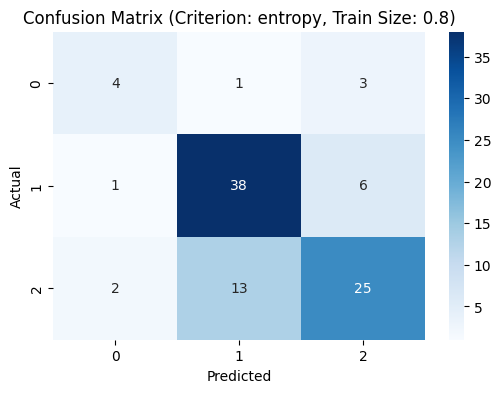


Train Size: 0.9, Test Size: 0.1, Criterion: gini
Accuracy: 0.6595744680851063
Classification Report:
               precision    recall  f1-score   support

        High       0.50      0.33      0.40         3
         Low       0.63      0.77      0.69        22
      Medium       0.72      0.59      0.65        22

    accuracy                           0.66        47
   macro avg       0.62      0.57      0.58        47
weighted avg       0.66      0.66      0.65        47



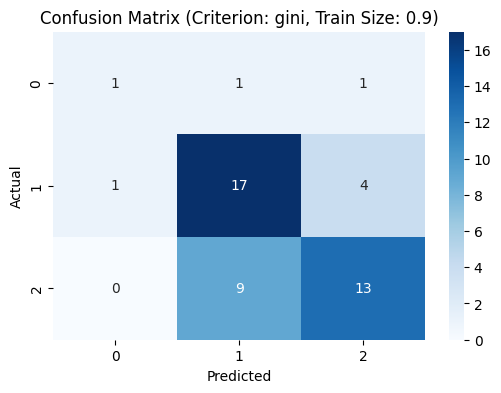


Train Size: 0.9, Test Size: 0.1, Criterion: entropy
Accuracy: 0.6808510638297872
Classification Report:
               precision    recall  f1-score   support

        High       0.25      0.33      0.29         3
         Low       0.71      0.77      0.74        22
      Medium       0.74      0.64      0.68        22

    accuracy                           0.68        47
   macro avg       0.57      0.58      0.57        47
weighted avg       0.69      0.68      0.68        47



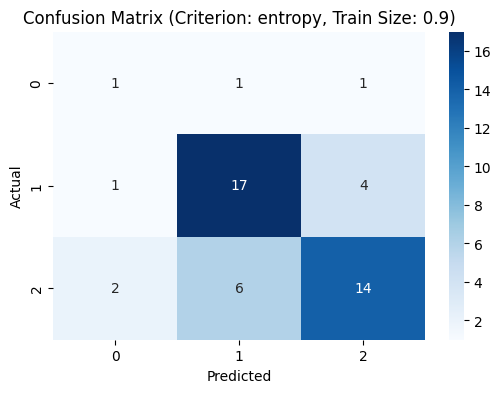

   Train Size  Test Size Criterion  Accuracy  \
0         0.7        0.3      gini  0.633094   
1         0.7        0.3   entropy  0.633094   
2         0.8        0.2      gini  0.720430   
3         0.8        0.2   entropy  0.720430   
4         0.9        0.1      gini  0.659574   
5         0.9        0.1   entropy  0.680851   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  
5                precision    recall  f1-score   ...  


In [66]:
# Define partition sizes
partition_sizes = [(0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]
results = []

for train_size, test_size in partition_sizes:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_binned, train_size=train_size, random_state=42)
    
    for criterion in ['gini', 'entropy']:
        # Initialize Decision Tree classifier with the specified criterion
        clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        # Store results
        results.append({
            'Train Size': train_size,
            'Test Size': test_size,
            'Criterion': criterion,
            'Accuracy': accuracy,
            'Classification Report': report
        })
        
        # Display results
        print(f"\nTrain Size: {train_size}, Test Size: {test_size}, Criterion: {criterion}")
        print(f"Accuracy: {accuracy}")
        print("Classification Report:\n", report)
        
        # Plot confusion matrix
        plt.figure(figsize=(6,4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix (Criterion: {criterion}, Train Size: {train_size})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

results_df = pd.DataFrame(results)
print(results_df)


In applying the Decision Tree Classifier to our dataset, we examined model performance across three different train-test splits (70-30, 80-20, and 90-10) using both Gini and Entropy as criteria for splitting nodes. Starting with the **Gini criterion**, we observed an accuracy of 63.31% with a 70-30 split, 72.04% with an 80-20 split, and 65.96% with a 90-10 split. The highest accuracy for Gini was achieved with the 80-20 split, suggesting that this proportion provided a good balance between training and testing data for this dataset. 

For the **Entropy criterion**, the results were nearly identical to those of Gini, with accuracies of 63.31%, 72.04%, and 68.09% for the 70-30, 80-20, and 90-10 splits, respectively. Similarly, the 80-20 split produced the highest accuracy, again indicating that this split provided an optimal training-to-testing ratio. Overall, both criteria performed comparably well, with the 80-20 split emerging as the most effective configuration, making it the best choice for building a reliable model on this dataset.

In [86]:
#Clustering
#drop and scale

from sklearn.preprocessing import StandardScaler
# 1. Convert categorical columns to numerical using pd.get_dummies
#    Drop 'price', 'Class_Label', and 'discretized_price' as they are target-related
features = HousingC.drop(['price', 'Class_Label', 'discretized_price'], axis=1)

# 2. Use StandardScaler to scale the features
# This scales all features to be on the same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Create a new DataFrame with the scaled features
HousingC_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# 4. Display the first 5 rows of the scaled DataFrame
print("\nScaled DataFrame:")
print(HousingC_scaled.head())



Scaled DataFrame:
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  0.687763  1.735836  -0.500988  0.613917  0.432642  -0.453574  1.325124   
1  1.022328  1.735836   1.773105  0.613917  0.432642   2.204713  1.325124   
2 -0.092888  0.216569   1.773105  0.613917  0.432642   2.204713 -0.754647   
3  0.921958  0.216569   1.773105  0.613917  0.432642  -0.453574 -0.754647   
4 -0.249018  0.216569  -0.500988  0.613917  0.432642  -0.453574  1.325124   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
0        -0.212478        -0.608130  1.822229 -0.538232         -0.153071  
1        -0.212478         1.644384  0.532180  1.857935          1.184131  
2        -0.212478         1.644384  1.822229 -0.538232         -1.490272  
3        -0.212478         1.644384  0.532180  1.857935         -0.153071  
4         4.706379        -0.608130  1.822229 -0.538232         -0.153071  


I applied scaling to ensure that all features are on the same scale, as K-means relies on distance measurements to form clusters. If the units differ significantly, features with larger values could unfairly influence the results. Additionally, I removed everything related to the target variable, such as class labels and price, to focus solely on the features relevant for clustering.

K=2: WCSS=4816.887852648317, Silhouette Score=0.16758863832753448
K=4: WCSS=4229.139404394767, Silhouette Score=0.10061890960368887
K=7: WCSS=3505.3898179922026, Silhouette Score=0.12417507885524988


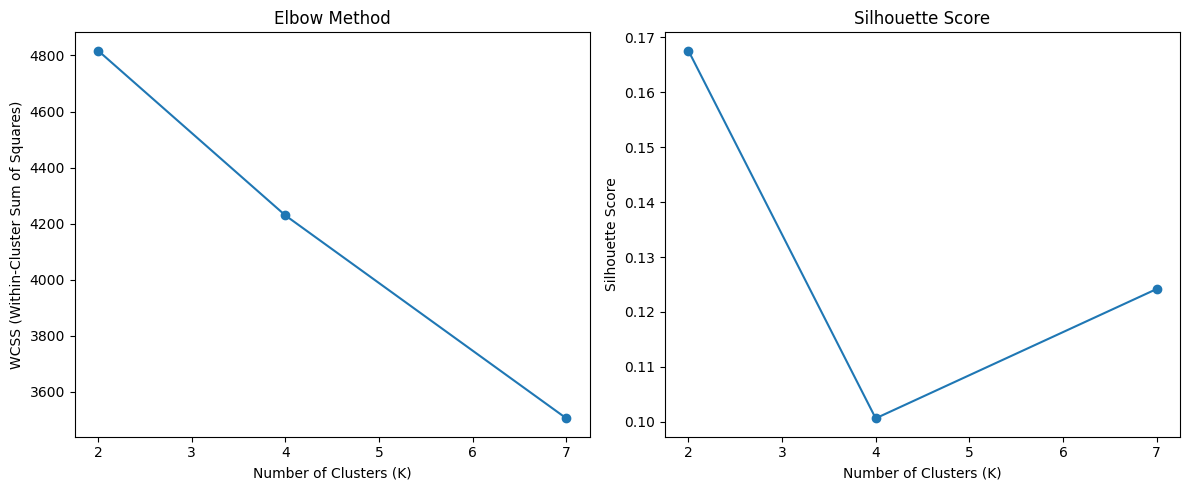

In [88]:
# K-means Clustering with Three Different Sizes of K (2, 4, 7) and Evaluation

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming your scaled and processed data is stored in a variable called scaled_features

# Define different values of K to try
k_values = [2, 4, 7]  # Updated K values
wcss = []  # To store Within-Cluster Sum of Squares (WCSS)
silhouette_scores = []  # To store Silhouette scores

# Apply K-means for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(scaled_features)
    
    # Calculate WCSS
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f"K={k}: WCSS={kmeans.inertia_}, Silhouette Score={silhouette_avg}")

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


I applied K-means clustering to my data using three different values for K (2, 4, and 7) to analyze how the number of clusters affects clustering quality. Here’s the reasoning and results for each choice:

K=2:
Justification: I chose this value as an initial test to observe the basic grouping and separation of the data. Starting with a smaller number of clusters helps identify whether the data can be meaningfully divided into distinct groups.
Results: The Silhouette Score was relatively high, indicating that clusters were well-separated. However, the WCSS (Within-Cluster Sum of Squares) was high as well, showing some dispersion within clusters.
                                                                                                                                                                                           
K=4:
Justification: I selected this value as a middle ground to test whether increasing the number of clusters would improve the compactness of points within each cluster.
Results: The WCSS decreased compared to K=2, indicating better compactness. However, the Silhouette Score dropped significantly, suggesting that clusters started to overlap and become less distinct.
                                       
K=7:
Justification: I chose this value to test if further increasing the number of clusters would significantly reduce dispersion and improve clustering quality.
Results: The WCSS continued to decrease, suggesting tighter clustering. However, the Silhouette Score only slightly improved, indicating that adding more clusters increased complexity without clearly enhancing separation between clusters.
                                       
Overall, the Elbow Method did not reveal a clear "elbow point" to indicate an optimal K. However, K=2 provided better separation between clusters, while K=4 and K=7 reduced dispersion but introduced complexity and overlap without substantial improvement.